# Assignment #2

# 1. Random Variables (20 pts)

*Note that all proofs must be done using Latex in the corresponding cell block.

**1.1** Prove that $E[aX + b] = aE[X] + b$

$E[aX+b]=\sum_{x}(ax+b)p(x)$

$E[aX+b]=\sum_{x}(ax*p(x)+b*p(x))$

$E[aX+b]=\sum_{x}ax*p(x)*\sum_{x}b*p(x)$

$E[aX+b]=a\sum_{x}x*p(x)*b\sum_{x}p(x)$

where $a\sum_{x}x*p(x) = E(X)$, $b\sum_{x}p(x)$ = 1

$E[aX + b] = aE[X] + b$

**1.2** Prove that $Var(X) = E[X^2] - E[X]^2$.

$Var(𝑋)=𝐸[(𝑋−𝜇)^2]$

$Var(𝑋)=𝐸[(𝑋−𝐸[𝑋])^2]$

$Var(𝑋)Var(𝑋)=𝐸[(𝑋−𝐸[𝑋])(𝑋−𝐸[𝑋])]$

$Var(𝑋)=𝐸[𝑋^2−2𝑋𝐸[𝑋]+(𝐸[𝑋])^2]$

$Var(𝑋)=𝐸[𝑋^2]−2𝐸[𝑋𝐸[𝑋]]+𝐸[(𝐸[𝑋])^2]$

$Var(𝑋)=𝐸[𝑋^2]−2𝐸[𝐸[𝑋]𝐸[𝑋]]+𝐸[(𝐸[𝑋])^2]$

$Var(𝑋)=𝐸[𝑋^2]−2(𝐸[𝑋])^2+(𝐸[𝑋])^2$

$Var(𝑋)=𝐸[𝑋^2]−(𝐸[𝑋])^2$

**1.3** Prove that $Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y)$

$Var(X+Y)=E((X+Y)-(E(X)+E(Y))^2)$

$=E((X-E(X))+(Y-E(Y))^2)$

we regard $X-E(X)$ as a and $Y-E(Y)$ as b

$E(a+b)^2 = E(a+b)(a+b) = E(a^2+b^2+2ab)$

$= E(X-E(X))^2 +E(Y-E(Y))^2+E(2(X-E(X)(Y-E(Y)))$

$ = Var(X) + Var(Y) + 2Cov(X,Y)$

**1.4** Given the probability density function of the uniform distribution:

$$
f_X = 
\begin{cases}
\frac{1}{b-a} & a \le x \le b, \\
0 & \text{for}\;x \lt a\;\text{or}\;x \gt b.
\end{cases}$$

Prove that $E[X] = \frac{a+b}{2}$ and $Var(X) = \frac{(b-a)^2}{12}$.

$E[X]=\int_x xf(x) dx$
$=\int_a^b \frac {x}{b-a} dx = \frac{a+b}{2}$ 

Knowing $Var(X) = E[X^2] - E[X]^2$, we can get

$Var(X) = \int_{a^2}^{b^2} \frac {x^2}{b^2-a^2} dx - (\frac{a+b}{2})^2$
$=\frac{(b-a)^2}{12}$

# 2. Distance between two points (20 points)

In homework 1, we found using the spherical law of cosines, that the arc length between Durham and Chicago is 998.233 km. If we first project the geographical coordinates of the two cities onto a 2d plane, we should, in principle, be able to use the euclidean distance to calculate the distance between the two cities. Using this approach, calculate the distance between Durham and Chicago using the following three map projections. Provide a one paragraph explanation of how the computed distances differ.

* Oblique Azimuthal equidistant
* Mercator
* Cylindrical Equal Area

Items to keep in mind:
* Only Numpy can be used for this problem. The use of other geospatial software or libraries will not be accepted.
* The forward transformations for the three projections can be found in the book "Map Projections--A Working Manual" which is included in the folder "Other" in the GitHub repository under the filename "Snyder1987.pdf".
* The geographic coordinates of Durham, NC are 35.9940$^o$ N and 78.8986$^o$ W. The coordinates of Chicago, IL are 41.8781$^o$ N and 87.6298$^o$ W.


In [23]:
#1   Oblique Azimuthal Equidistant projection
pi_1 = 35.9940 * np.pi /180
lam_0 = -78.8986 * np.pi /180
pi = 41.8781 * np.pi /180
lam = -87.6298 * np.pi /180
rad = 6371.0

c = np.arccos(np.sin(pi_1)*np.sin(pi)+np.cos(pi_1)*np.cos(pi)*np.cos(lam-lam_0))
kp = c/np.sin(c)
x = rad*kp*np.cos(pi)*np.sin(lam-lam_0)
y = rad*kp*(np.cos(pi_1)*np.sin(pi)-np.sin(pi_1)*np.cos(pi)*np.cos(lam-lam_0))
dist = np.sqrt(x**2 + y**2)
print ('(1) By using the Oblique Azimuthal Equidistant projection, the computed distance is',dist,'.')

#2   Mercator projection
rad = 6371.0
lam_0 = 0
pi_1 = 35.9940 * np.pi /180
lam_1 = -78.8986 * np.pi /180
pi_2 = 41.8781 * np.pi /180
lam_2 = -87.6298 * np.pi /180

x1= rad*(lam_1-lam_0)
y1= rad*np.log(np.tan(np.pi/4+pi_1/2))
x2= rad*(lam_2-lam_0)
y2= rad*np.log(np.tan(np.pi/4+pi_2/2))
dist= np.sqrt((x2-x1)**2 + (y2-y1)**2)
print ('(2) By using the Mercator projection, the computed distance is',dist,'.')

#3   Cylindrical Equal Area projection
rad = 6371.0
pi_s, lam_0 = 0,0
pi_1 = 35.9940 * np.pi /180
lam_1 = -78.8986 * np.pi /180
pi_2 = 41.8781 * np.pi /180
lam_2 = -87.6298 * np.pi /180

x1= rad*(lam_1-lam_0)*np.cos(pi_s)
y1= rad*np.sin(pi_1)/np.cos(pi_s)
x2= rad*(lam_2-lam_0)*np.cos(pi_s)
y2= rad*np.sin(pi_2)/np.cos(pi_s)
dist= np.sqrt((x2-x1)**2 +(y2-y1)**2)
print('(3) By using the Cylindrical Equal Area projection, the computed distance is',dist,'.')


(1) By using the Oblique Azimuthal Equidistant projection, the computed distance is 998.2333233016451 .
(2) By using the Mercator projection, the computed distance is 1285.1223526945937 .
(3) By using the Cylindrical Equal Area projection, the computed distance is 1096.067181788751 .


# 3. Calculating the correct spatial mean (20 pts)

A simple spatial mean of a regular lat/long grid (Plate Carree) can lead to large discrepancies in the estimated spatial mean. To assess this impact, we are going to use the variable `t2m` in the annual ERA-Interim database (`/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann`). Start by assembling an array of actual area per pixel and then compute for each year the area weighted mean. Then compare the resulting time series to that resulting from using the equally weighted spatial mean (i.e., naive approach). Provide an explanation of your results.

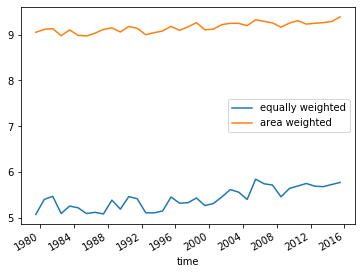

In [21]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = xr.open_dataset(file)
t2m = fp['t2m']

#time
t2m_eq = t2m.groupby('time').mean(('lat','lon'))

#area
area = np.cos(np.deg2rad(t2m.lat))
t2m_area = (t2m*area).groupby('time').mean(('lat','lon'))

#plotting
t2m_eq.plot(label = 'equally weighted')
t2m_area.plot(label = 'area weighted')
plt.legend()

fp.close()

# 4. North Carolina county level elevation statistics (20 pts)

Given the shapefile of county boundaries (`/data/HW/HW2/NCDOT_County_Boundaries.shp`) and the USGS National Elevation Dataset (`/data/NED/NED.vrt`), compute the following statistics: the spatial mean, the spatial standard deviation, and the coefficient of variation of elevation per NC county. Once this database is assembled, use bar plots to show the results across all the counties (one bar plot per statistic). Explain the results. To make things simple you will want to use the Plate Carree projection (regular lat/lon grid) at a 0.01 by 0.01 arcdegree spatial resolution.

In [45]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from collections import defaultdict

In [58]:
%%bash
gdalwarp -te -85 33 -75 37 -tr 0.01 0.01 -r near -overwrite /data/NED/NED.vrt /home/jovyan/work/ESDA_lg/dem_nc.tif

Creating output file that is 1000P x 400L.
Processing /data/NED/NED.vrt [1/1] : 0Using internal nodata values (e.g. -99999) for image /data/NED/NED.vrt.
Copying nodata values from source /data/NED/NED.vrt to destination /home/jovyan/work/ESDA_lg/dem_nc.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [66]:
%%bash
ogr2ogr -f "ESRI Shapefile" -t_srs EPSG:4326 -s_srs EPSG:4269 /home/jovyan/work/ESDA_lg/NCDOT_County_Boundaries_latlon.shp /data/HW/HW2/NCDOT_County_Boundaries.shp
# this part keep showing error code says Warning 1: Value [] of [] of feature [] not successfully written. Possibly due to too larger number with respect to field width
# found issues discussed here https://trac.osgeo.org/gdal/ticket/6803 but could not found a solution

In [67]:
%%bash
gdal_rasterize -l NCDOT_County_Boundaries_latlon -a FIPS -te -84.5 33.5 -75 37 -tr 0.01 0.01 /home/jovyan/work/ESDA_lg/NCDOT_County_Boundaries_latlon.shp /home/jovyan/work/ESDA_lg/NCDOT_County_Boundaries_raster.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [68]:
elev=rasterio.open('/home/jovyan/work/ESDA_lg/dem_nc.tif').read(1)
counties_rasterized=rasterio.open('/home/jovyan/work/ESDA_lg/NCDOT_County_Boundaries_raster.tif').read(1)

d=defaultdict(list)
for i in range(elev.shape[0]):
    for j in range(elev.shape[1]):
        if counties_rasterized[i][j]!=0:
            d[counties_rasterized[i][j]].append(elev[i][j])
            
elev_mean,elev_std = [],[]
for county in sorted(d.items(),key=lambda item: item[0]):
    elev_mean.append(np.mean(county[1]))
    elev_std.append(np.std(county[1]))
elev_mean = np.array(elev_mean)
elev_std = np.array(elev_std)
elev_covar=elev_std/elev_mean

IndexError: index 950 is out of bounds for axis 0 with size 950

Text(0, 0.5, 'variation corefficient of elevation in North Carolina counties')

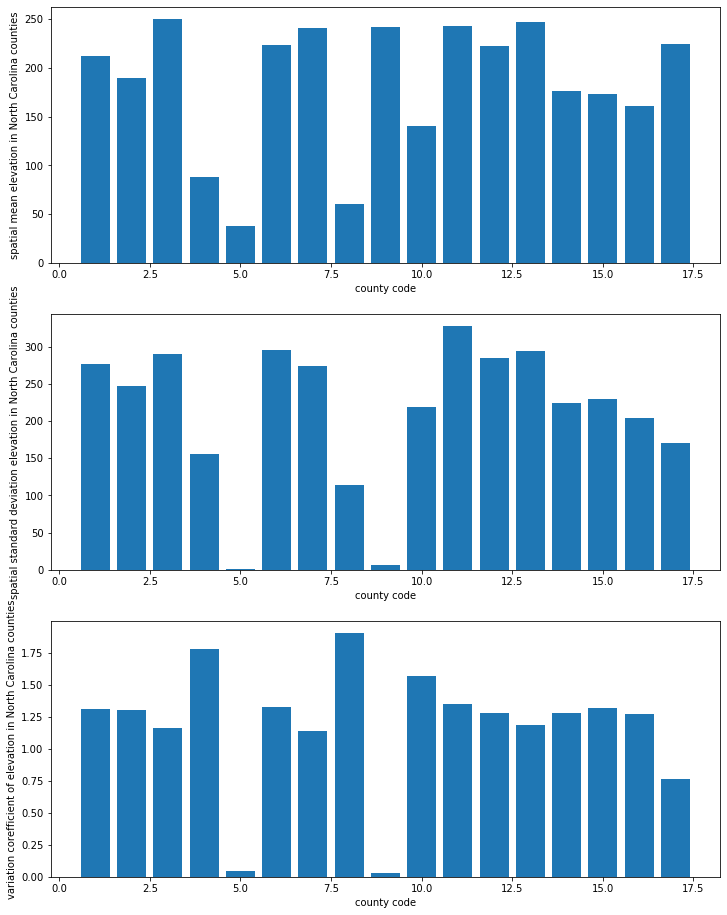

In [70]:
ct_code=np.arange(1,elev_mean.size+1)
fig,axs=plt.subplots(3,figsize=(12,16))
axs[0].bar(ct_code,elev_mean)
axs[0].set_xlabel('county code')
axs[0].set_ylabel('spatial mean elevation in North Carolina counties')
axs[1].bar(ct_code,elev_std)
axs[1].set_xlabel('county code')
axs[1].set_ylabel('spatial standard deviation elevation in North Carolina counties')
axs[2].bar(ct_code,elev_covar)
axs[2].set_xlabel('county code')
axs[2].set_ylabel('variation corefficient of elevation in North Carolina counties')


# 5. Flying from LAX to LHR (20 pts)

Create a rotating globe that tracks an actual flight from Los Angeles to London that happened between 2020/09/17-2020/09/18. The file `/data/HW/HW2/lax2lhr_20200917.pck` contains the GPS location of the flight at discrete timestamps during the flight. The goal here is to create a movie where each frame builds on the previous one to build out the time evolving flight path. The flight path should be drawn as lines joined at nodes. Each frame update should correspond to a new timestamp. Furthermore, for each timestamp, the globe should be centered on the timestamp's corresponding longitude. Finally, add the time evolving rainfall maps that was forecasted during each timestamp. For this part, you will use a 9/17/2020 forecast from NOAA's Global Forecasting System (GFS) which you can find in  `/data/HW/HW2/gfs20200917_gfs_0p25_1hr_00z.nc`. The variable of interest in that dataset will be `pratesfc`. Note that there are many ways to do this problem so feel free to explore your own ideas. However, for reference, below is an example of what the last frame might look like. We look forward to seeing what you come up with! 
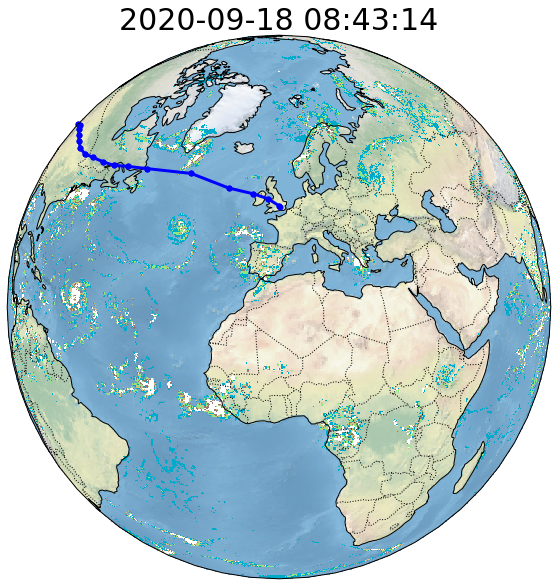

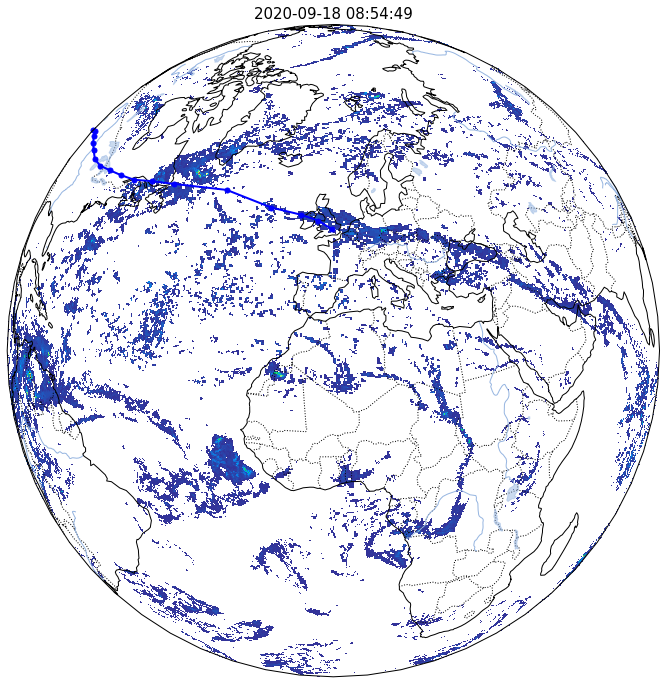

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cartopy 
import pickle as pkl
import xarray as xr
from matplotlib import animation
from IPython.display import HTML

file=open('/data/HW/HW2/lax2lhr_20200917.pck','rb')

gpsinfo = pkl.load(file)
lat,lon,dates = gpsinfo['lat'],gpsinfo['lon'],gpsinfo['date']
lonlats = np.stack((lon,lat),axis = -1)

fp = xr.open_dataset('/data/HW/HW2/gfs20200917_gfs_0p25_1hr_00z.nc')
rf = fp['pratesfc'].sel(time=dates,method='nearest')

img_extent=(-180,180,-90,90)
fig=plt.figure(figsize=(12,12))
dem=np.ma.masked_array(rf,rf ==0)

def animate(i):
    plt.clf()
    ax=plt.axes(projection=cartopy.crs.Orthographic(central_longitude=lon[i],central_latitude=30))
    vmin=np.min(dem[i])
    vmax=np.max(dem[i])
    
    im= plt.imshow(dem[i],vmin=vmin,vmax=vmax,
                    transform=cartopy.crs.PlateCarree(),
                    cmap=plt.get_cmap('terrain'),extent=(img_extent))
    plt.xticks([])
    plt.yticks([])
    
    ax.add_feature(cartopy.feature.BORDERS,linestyle=":")
    ax.add_feature(cartopy.feature.RIVERS)
    ax.add_feature(cartopy.feature.LAKES,alpha=0.5)
    ax.add_feature(cartopy.feature.COASTLINE)
  
    
    ax.set_title('%04d-%02d-%02d %02d:%02d:%02d' % (dates[i].year, dates[i].month, dates[i].day, dates[i].hour, dates[i].minute, dates[i].second), fontsize=15)
    
    line=plt.plot(lonlats[:i*1,0],lonlats[:i*1,1],color='blue',marker='.',markersize=10,linewidth=2,transform=cartopy.crs.PlateCarree())
    
    return(im, )

anim=animation.FuncAnimation(fig,animate,frames=len(dates),interval=300,blit=True)
HTML(anim.to_html5_video())